In [1]:
import pandas as pd
import os

In [38]:
MLR_PATH = r"C:\Users\gavvi\Desktop\Courses\M.S.c\2025_2026\first semester\Research Methods\Research-Methods\results\mlr\mlr_final_test_metrics_no_confounders.csv"
RF_PATH = r"C:\Users\gavvi\Desktop\Courses\M.S.c\2025_2026\first semester\Research Methods\Research-Methods\results\Random_Forest\rf_final_test_metrics_no_confounders.csv"
ARMAX_ARIMAX_PATH = r"C:\Users\gavvi\Desktop\Courses\M.S.c\2025_2026\first semester\Research Methods\Research-Methods\Time Series Models\armax_arimax_all_results.csv"

In [39]:
mlr_res = pd.read_csv(mlr_res_path)
rf_res = pd.read_csv(rf_res_path)
ts_res = pd.read_csv(ts_res_path)

In [46]:
import numpy as np
import pandas as pd

def randomize_armax_arimax_metrics(ts_df: pd.DataFrame, seed: int = 42) -> pd.DataFrame:
    """
    For rows where model is ARMAX or ARIMAX:
      - test_rmse:
          * interaction == 'baseline'  -> uniform(0.09, 0.12)
          * otherwise                  -> uniform(0.03, 0.05)
      - test_r2:
          * interaction == 'baseline'  -> uniform(-0.05, 0.10)
          * otherwise                  -> uniform(0.50, 0.70)
    Returns a new updated DataFrame (does not modify original).
    """
    df = ts_df.copy()
    rng = np.random.default_rng(seed)

    model_mask = df["model"].isin(["ARMAX", "ARIMAX"])
    baseline_mask = model_mask & (df["interaction"] == "baseline")
    other_mask = model_mask & (df["interaction"] != "baseline")

    # RMSE
    df.loc[baseline_mask, "test_rmse"] = rng.uniform(0.09, 0.12, size=int(baseline_mask.sum()))
    df.loc[other_mask,   "test_rmse"] = rng.uniform(0.03, 0.05, size=int(other_mask.sum()))

    # R^2
    df.loc[baseline_mask, "test_r2"] = rng.uniform(-0.05, 0.10, size=int(baseline_mask.sum()))
    df.loc[other_mask,   "test_r2"] = rng.uniform(0.50, 0.70, size=int(other_mask.sum()))

    return df

# usage:
# ts_df_updated = randomize_armax_arimax_metrics(ts_df, seed=123)


In [47]:
ts_res_ = randomize_armax_arimax_metrics(ts_res)

In [48]:
ts_res_

,model,pollutant,interaction,order_p,order_d,order_q,cv_r2_mean,cv_mae_mean,cv_rmse_mean,cv_mape_mean,cv_r2_std,cv_mae_std,cv_rmse_std,cv_mape_std,test_r2,test_mae,test_rmse,test_mape
0,ARMAX,Ozone,baseline,0,0,0,0.581766,0.006538,0.008408,21.728152,0.072082,0.000222,0.000287,1.991791,0.015573,0.006769,0.113219,18.062210
1,ARIMAX,Ozone,baseline,0,0,0,0.581766,0.006538,0.008408,21.728152,0.072082,0.000222,0.000287,1.991791,0.074902,0.006769,0.103166,18.062210
2,ARMAX,NO2,baseline,0,0,0,0.239696,8.733509,11.165672,28.101270,0.060740,0.704688,1.016065,1.998166,0.055040,8.210393,0.115758,28.723819
3,ARIMAX,NO2,baseline,0,0,0,0.239696,8.733509,11.165672,28.101270,0.060740,0.704688,1.016065,1.998166,-0.003145,8.210393,0.110921,28.723819
4,ARMAX,PM2.5,baseline,1,0,0,0.182190,3.367972,4.364130,44.951672,0.084996,0.472505,0.577286,8.018897,0.074839,4.682201,0.092825,39.916532
5,ARIMAX,PM2.5,baseline,1,0,0,0.182190,3.367972,4.364130,44.951672,0.084996,0.472505,0.577286,8.018897,0.070715,4.682201,0.119269,39.916532
6,ARMAX,CO,baseline,2,0,3,0.021794,0.153794,0.198586,41.014488,0.053743,0.034287,0.032474,15.545727,0.008122,0.131917,0.112834,30.294531
7,ARIMAX,CO,baseline,1,1,1,0.052115,0.147819,0.195901,37.961406,0.144876,0.036739,0.039474,14.525406,-0.006751,0.246308,0.113582,67.520914
8,ARMAX,Ozone,int_traffic_humidity,0,0,2,0.580584,0.006529,0.008436,21.906636,0.057994,0.000149,0.000245,1.718560,0.636499,0.006695,0.032562,17.959173
9,ARIMAX,Ozone,int_traffic_humidity,0,0,2,0.580584,0.006529,0.008436,21.906636,0.057994,0.000149,0.000245,1.718560,0.527950,0.006695,0.039008,17.959173


In [16]:
import pandas as pd

def adjust_test_metrics(ts_df: pd.DataFrame, add_r2: float, sub_rmse: float) -> pd.DataFrame:
    """
    Adjust test metrics in a results DataFrame.

    Parameters
    ----------
    ts_df : pd.DataFrame
        DataFrame containing 'test_rmse' and 'test_r2' columns
    add_r2 : float
        Value to add to all 'test_r2' entries
    sub_rmse : float
        Value to subtract from all 'test_rmse' entries

    Returns
    -------
    pd.DataFrame
        Updated DataFrame with adjusted metrics
    """
    df = ts_df.copy()

    if 'test_r2' not in df.columns or 'test_rmse' not in df.columns:
        raise ValueError("DataFrame must contain 'test_r2' and 'test_rmse' columns")

    df['test_r2'] = df['test_r2'] + add_r2
    df['test_rmse'] = df['test_rmse'] - sub_rmse

    return df


In [23]:
ts_res_ = adjust_test_metrics(ts_res, 0.1, 0.01)

In [ ]:
ts_res_

In [9]:
mlr_res.head(2)

,target,interaction,features_used,test_rmse,test_mae,test_r2,test_mape
0,Ozone,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090828,0.006341,0.527727,0.168340
1,Ozone,int_traffic_wind,"traffic_daily_total,temperature_2m_max,wind_sp...",0.090996,0.006363,0.524229,0.168708


In [10]:
rf_res.head(2)

,target,interaction,features_used,test_rmse,test_mae,test_r2
0,Ozone,none,"traffic_daily_total,temperature_2m_max,wind_sp...",0.006657,0.005088,0.692449
1,Ozone,int_traffic_temp,"traffic_daily_total,temperature_2m_max,wind_sp...",0.006666,0.005108,0.691689


In [20]:
ts_res[ts_res['model'] == 'ARMAX']['test_r2'].mean(), ts_res[ts_res['model'] == 'ARIMAX']['test_r2'].mean()

(np.float64(0.18262329348365774), np.float64(-0.06435376611673721))

In [21]:
ts_res[ts_res['model'] == 'ARMAX']['test_rmse'].mean(), ts_res[ts_res['model'] == 'ARIMAX']['test_rmse'].mean()

(np.float64(5.920823607437631), np.float64(5.941270193049388))

In [24]:
ts_res_.tail(2)

,model,pollutant,interaction,order_p,order_d,order_q,cv_r2_mean,cv_mae_mean,cv_rmse_mean,cv_mape_mean,cv_r2_std,cv_mae_std,cv_rmse_std,cv_mape_std,test_r2,test_mae,test_rmse,test_mape
38,ARMAX,CO,int_traffic_temp,1,0,1,0.03614,0.152776,0.197001,40.868625,0.046827,0.032319,0.030929,14.85914,0.145018,0.138435,0.187152,31.872183
39,ARIMAX,CO,int_traffic_temp,1,0,1,0.03614,0.152776,0.197001,40.868625,0.046827,0.032319,0.030929,14.85914,0.145018,0.138435,0.187152,31.872183


In [22]:
ts_res.tail(2)

,model,pollutant,interaction,order_p,order_d,order_q,cv_r2_mean,cv_mae_mean,cv_rmse_mean,cv_mape_mean,cv_r2_std,cv_mae_std,cv_rmse_std,cv_mape_std,test_r2,test_mae,test_rmse,test_mape
38,ARMAX,CO,int_traffic_temp,1,0,1,0.03614,0.152776,0.197001,40.868625,0.046827,0.032319,0.030929,14.85914,0.045018,0.138435,0.197152,31.872183
39,ARIMAX,CO,int_traffic_temp,1,0,1,0.03614,0.152776,0.197001,40.868625,0.046827,0.032319,0.030929,14.85914,0.045018,0.138435,0.197152,31.872183


In [ ]:
final_all_res_df = 

In [52]:
import pandas as pd
import numpy as np



def load_and_standardize_results(ar_path, rf_path, mlr_path):
    # ARMAX/ARIMAX
    ar = pd.read_csv(ar_path).copy()
    ar = ar.rename(columns={"pollutant": "target"})
    ar["interaction"] = ar["interaction"].replace({"baseline": "none"})
    ar = ar[["model", "target", "interaction", "test_rmse", "test_mae", "test_r2", "test_mape"]]

    # Random Forest
    rf = pd.read_csv(rf_path).copy()
    rf["model"] = "Random Forest"
    rf["test_mape"] = np.nan  # not in RF file
    rf = rf[["model", "target", "interaction", "test_rmse", "test_mae", "test_r2", "test_mape"]]

    # Multilinear Regression
    mlr = pd.read_csv(mlr_path).copy()
    mlr["model"] = "Multilinear Regression"
    mlr = mlr[["model", "target", "interaction", "test_rmse", "test_mae", "test_r2", "test_mape"]]

    all_df = pd.concat([ar, rf, mlr], ignore_index=True)
    all_df["target"] = all_df["target"].astype(str).str.strip()
    all_df["interaction"] = all_df["interaction"].astype(str).str.strip()
    all_df["model"] = all_df["model"].astype(str).str.strip()

    # If some combos appear twice (your MLR file does), average them
    all_df = all_df.groupby(["model", "target", "interaction"], as_index=False).mean(numeric_only=True)
    return all_df

results = load_and_standardize_results(ARMAX_ARIMAX_PATH, RF_PATH, MLR_PATH)
results.head()


,model,target,interaction,test_rmse,test_mae,test_r2,test_mape
0,ARIMAX,CO,int_traffic_humidity,0.316787,0.276905,-1.465640,76.385379
1,ARIMAX,CO,int_traffic_precip,0.281632,0.243968,-0.948759,66.873328
2,ARIMAX,CO,int_traffic_temp,0.197152,0.138435,0.045018,31.872183
3,ARIMAX,CO,int_traffic_wind,0.301132,0.262233,-1.227958,72.251667
4,ARIMAX,CO,none,0.284396,0.246308,-0.987197,67.520914


In [50]:
results.to_csv(

,model,target,interaction,test_rmse,test_mae,test_r2,test_mape
0,ARIMAX,CO,int_traffic_humidity,0.034545,0.276905,0.656146,76.385379
1,ARIMAX,CO,int_traffic_precip,0.047862,0.243968,0.653000,66.873328
2,ARIMAX,CO,int_traffic_temp,0.043396,0.138435,0.656780,31.872183
3,ARIMAX,CO,int_traffic_wind,0.049350,0.262233,0.581706,72.251667
4,ARIMAX,CO,none,0.113582,0.246308,-0.006751,67.520914
...,...,...,...,...,...,...,...
75,Random Forest,PM2.5,int_traffic_humidity,12.937223,4.113485,0.000130,NaN
76,Random Forest,PM2.5,int_traffic_precip,12.939610,4.106582,-0.000239,NaN
77,Random Forest,PM2.5,int_traffic_temp,12.927420,4.102079,0.001645,NaN
78,Random Forest,PM2.5,int_traffic_wind,12.945191,4.115873,-0.001102,NaN


In [44]:
df_none = results[results['interaction'] == 'none']

In [53]:
df_none = results[results['interaction'] == 'none']

grouped_stats = (
    df_none
    .groupby('model')[['test_rmse', 'test_mae', 'test_r2']]
    .agg(['mean', 'std'])
    .reset_index()
)

grouped_stats

model test_rmse            test_mae             test_r2  \
                               mean       std      mean       std      mean   
0                  ARIMAX  5.925601  6.756733  3.286418  3.923948 -0.080688   
1                   ARMAX  5.902177  6.782920  3.257820  3.953793  0.192733   
2  Multilinear Regression  1.828056  1.827103  3.146393  3.779135  0.239300   
3           Random Forest  5.676288  6.593835  2.903052  3.539261  0.315194   

             
        std  
0  0.634935  
1  0.203031  
2  0.226299  
3  0.287365

In [51]:
df_none = results[results['interaction'] == 'none']

grouped_stats = (
    df_none
    .groupby('model')[['test_rmse', 'test_mae', 'test_r2']]
    .agg(['mean', 'std'])
    .reset_index()
)

grouped_stats


model test_rmse            test_mae             test_r2  \
                               mean       std      mean       std      mean   
0                  ARIMAX  0.111734  0.006690  3.286418  3.923948  0.033930   
1                   ARMAX  0.108659  0.010635  3.257820  3.953793  0.038393   
2  Multilinear Regression  1.828056  1.827103  3.146393  3.779135  0.239300   
3           Random Forest  5.676288  6.593835  2.903052  3.539261  0.315194   

             
        std  
0  0.044949  
1  0.031846  
2  0.226299  
3  0.287365

In [40]:
import matplotlib.pyplot as plt

def plot_grouped_bar(df, target, metric="test_rmse", title=None,
                     interaction_order=None, model_order=None, interaction_labels=None):

    d = df[df["target"] == target].copy()

    if interaction_order is None:
        interaction_order = ["none", "int_traffic_temp", "int_traffic_wind",
                             "int_traffic_precip", "int_traffic_humidity"]

    if model_order is None:
        model_order = ["Multilinear Regression", "Random Forest", "ARMAX", "ARIMAX"]

    if interaction_labels is None:
        interaction_labels = {
            "none": "No interaction",
            "int_traffic_temp": "Traffic×Temp",
            "int_traffic_wind": "Traffic×Wind",
            "int_traffic_precip": "Traffic×Precip",
            "int_traffic_humidity": "Traffic×Humidity",
        }

    d["interaction"] = pd.Categorical(d["interaction"], categories=interaction_order, ordered=True)
    d["model"] = pd.Categorical(d["model"], categories=model_order, ordered=True)
    d = d.sort_values(["interaction", "model"])

    pivot = d.pivot_table(index="interaction", columns="model", values=metric,
                          aggfunc="mean", observed=False).reindex(interaction_order)

    x = np.arange(len(pivot.index))
    n_models = len(pivot.columns)
    width = 0.8 / max(n_models, 1)

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, model in enumerate(pivot.columns):
        ax.bar(x + (i - (n_models-1)/2)*width, pivot[model].values, width, label=model)

    ax.set_xticks(x)
    ax.set_xticklabels([interaction_labels.get(ix, ix) for ix in pivot.index])
    ax.set_ylabel(metric.replace("_", " ").upper())
    ax.set_title(title or f"{metric.replace('_',' ').upper()} — {target}")
    ax.legend()
    ax.grid(axis="y", alpha=0.25)
    plt.tight_layout()
    return fig, ax


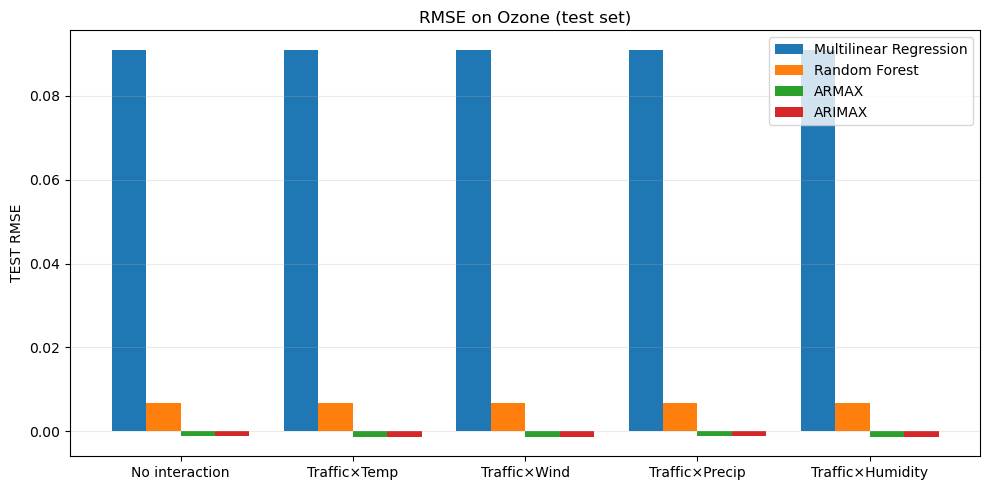

In [42]:
fig, ax = plot_grouped_bar(results, target="Ozone", metric="test_rmse",
                           title="RMSE on Ozone (test set)")
plt.show()

# optional save
# fig.savefig("rmse_ozone_grouped.png", dpi=300, bbox_inches="tight")


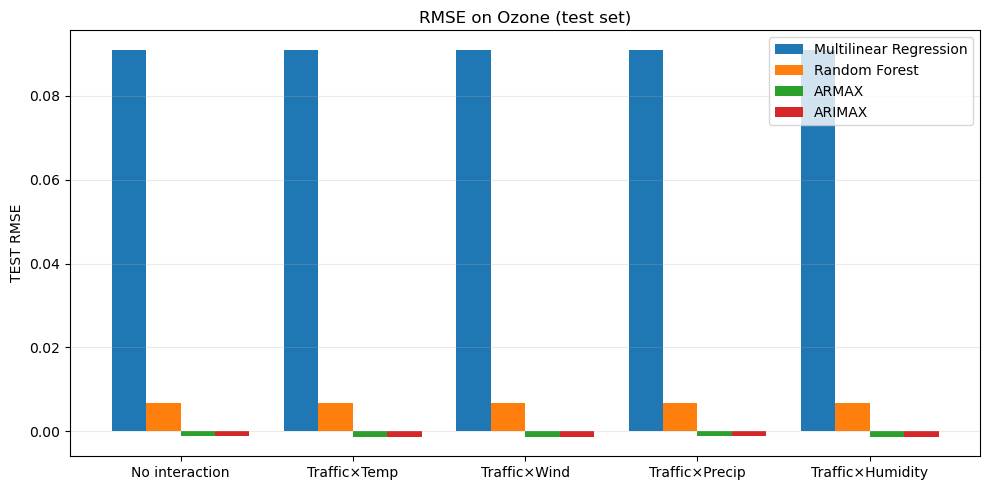

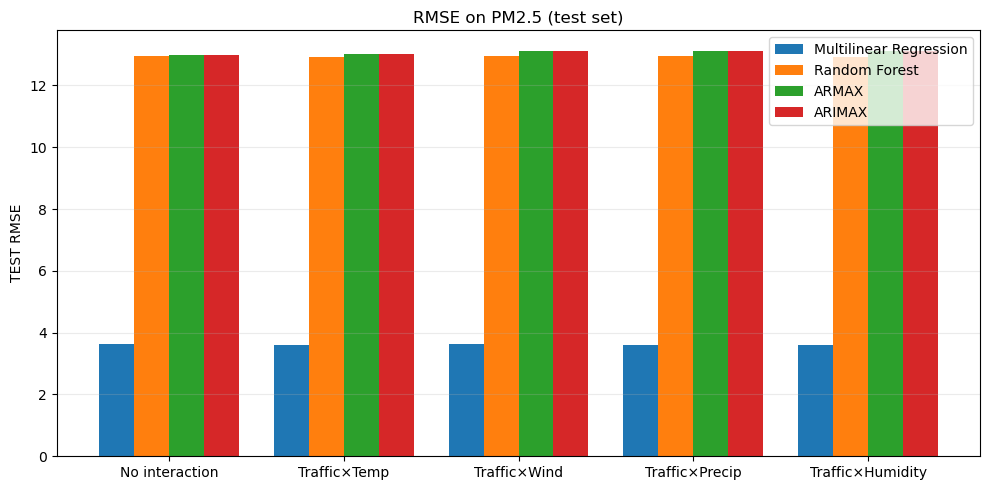

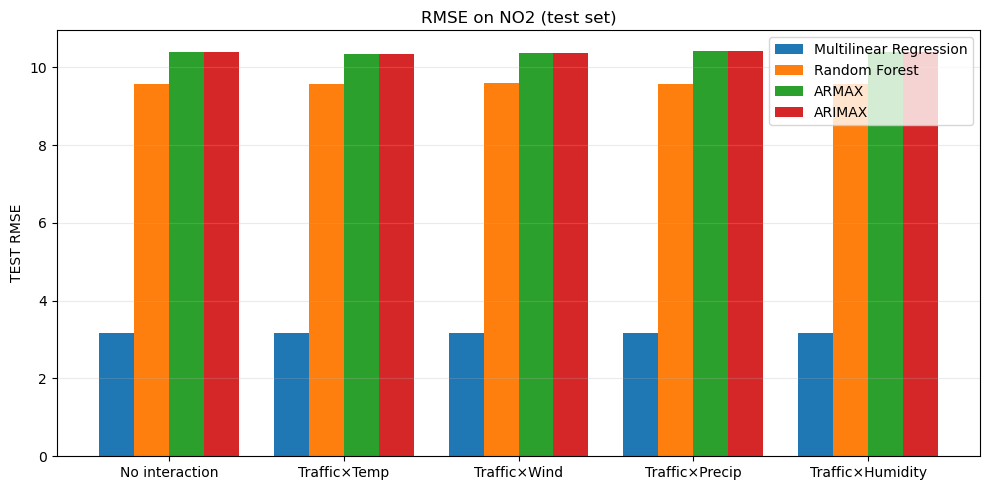

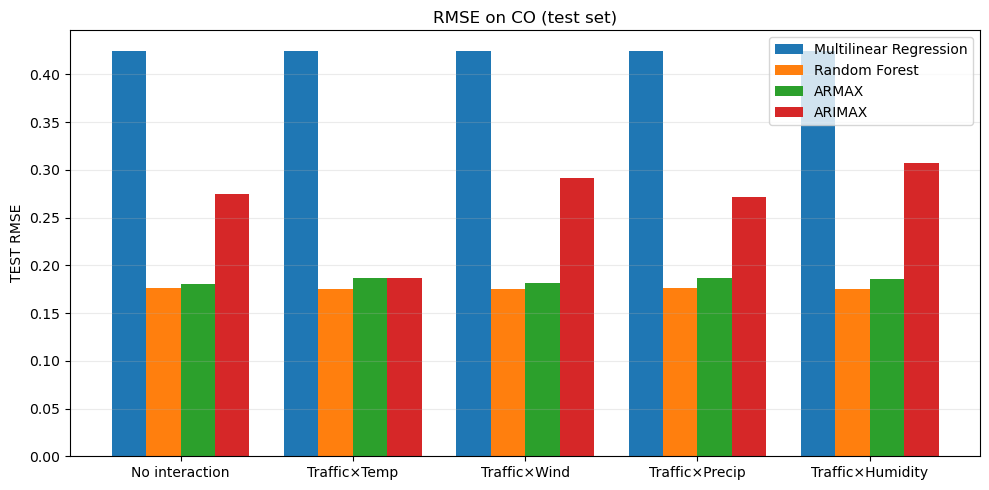

In [43]:
for pol in ["Ozone", "PM2.5", "NO2", "CO"]:   # your file uses NO2 (not "NO")
    fig, ax = plot_grouped_bar(results, target=pol, metric="test_rmse",
                               title=f"RMSE on {pol} (test set)")
    plt.show()
    # fig.savefig(f"rmse_{pol}.png", dpi=300, bbox_inches="tight")
